Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')


<Axes: xlabel='minutes', ylabel='artist'>

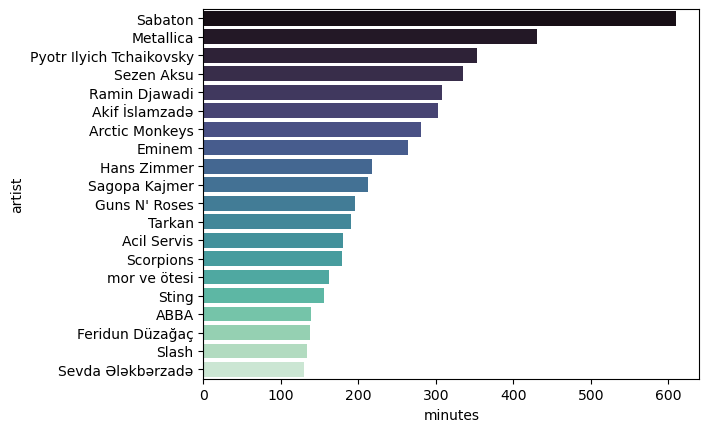

In [66]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file = "//Users//hajiaga//Downloads//Spotify Account Data//StreamingHistory_music_0.json"
with open(file, 'r') as filejs:
    jsonf = json.load(filejs)
df = pd.json_normalize(jsonf)
    
print(df.columns)

df.drop(["endTime"],axis = 1,inplace=True)
dfe = df.groupby("artistName")["msPlayed"].sum().reset_index()
dfe.sort_values(ascending= False,inplace=True , by="msPlayed")
dfe["msPlayed"] = dfe["msPlayed"]/60000
dfe.columns = ["artist" , "minutes"]
dfe.drop([8],axis=0,inplace = True)
dfe.at[183, "minutes"] = 352.4
dfe.at[108, "minutes"] = 217.4
dfe.at[103, "minutes"] = 196

plt.plot("Country"  , color = "black")
sns.set_palette("dark")
sns.barplot(y="artist" , x = "minutes" , data = dfe.nlargest(20 , "minutes" ),palette="mako")


<Axes: xlabel='minutes', ylabel='track'>

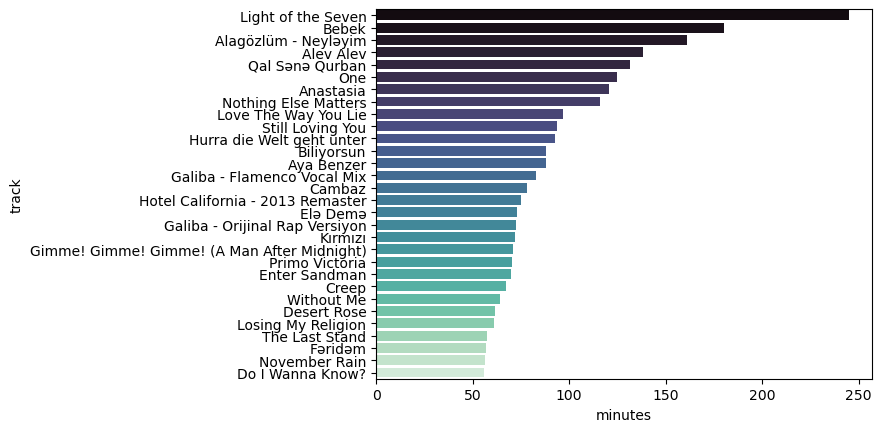

In [70]:
dfs = df.groupby("trackName")["msPlayed"].sum().reset_index()
dfs.sort_values(ascending= False,inplace=True , by="msPlayed")
dfs["msPlayed"] = dfs["msPlayed"]/60000
dfs.columns = ["track" , "minutes"]


plt.plot("Country"  , color = "black")
sns.set_palette("dark")
sns.barplot(y="track" , x = "minutes" , data = dfs.nlargest(30 , "minutes" ),palette="mako")